
# **SECJ 5043 - Advance Artifial Intelligence**

**PROJECT - OBJECT DETECTION**

Name: Muhammad Hazman Hanif Bin Roslan

Matric Number: A21MJ5039





#  **TABLE OF CONTENT**

1. Introduction
2. Import Libraries
3. Method Display Images
4. Method Download and Resize Images
5. Method Draw Boxes
6. Download and Train
7. Result
8. Conclusion

# **INTRODUCTION**
This study examines the use of deep learning and computer vision algorithms for object detection, with a specific focus on identifying chairs, windows, and trees inside photos. We use TensorFlow, a powerful open-source toolkit built by Google Brain that enables for the construction, training, and deployment of machine learning models.

Our solution involves use of a pre-trained model from TensorFlow Hub called the Faster R-CNN model, which stands for Fast Region-based Convolutional Network. This model is well-known for its ability to detect objects in images while also estimating their bounding boxes. The model is pre-trained on the Open Images V4 dataset and employs the Inception ResNet V2 architecture, which dramatically improves model performance and reduces training time.

The project involves downloading an image from a URL, resizing it, and then passing it through the model. The model’s output, which includes the class of the detected objects and their locations, is then used to draw bounding boxes around these objects in the image. This process is implemented in Python, with the use of additional libraries such as TensorFlow Hub, Matplotlib, NumPy, and PIL.

# **IMPORT LIBRARIES**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageColor, ImageOps
import time
from six.moves.urllib.request import urlopen
from six import BytesIO
import tempfile

**EXPLANATION**
* These lines import TensorFlow and TensorFlow Hub. TensorFlow is a powerful open-source library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning. TensorFlow Hub is a library for the publication, discovery, and consumption of reusable parts of machine learning models.

* Matplotlib is a plotting library for Python, and pyplot is its easy-to-use module which provides a MATLAB-like interface.

* NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* PIL (Python Imaging Library) is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. ImageDraw module provides simple 2D graphics for Image objects. ImageColor provides color tables and converters from CSS3-style color specifiers to RGB tuples. ImageOps contains a number of ‘ready-made’ image processing operations.

* Time module. It provides various time-related functions, including getting the current time, measuring processing times, and delaying execution.

* The six library.It provides utility functions for smoothing over the differences between Python 2 and Python 3, and makes it possible to write code that works on both versions. urlopen is used to open URLs. BytesIO is used for manipulating binary data directly in memory.

* The tempfile module generates temporary files and directories. It works by creating a unique file or directory in the temporary directory, thus reducing the likelihood of an attacker guessing its location.

# **METHOD DISPLAY IMAGE**

In [16]:
def display_image(image):
  fig = plt.figure(figsize=(10, 7))
  plt.grid(False)
  plt.imshow(image)

**EXPLANATION**

* This line defines the function display_image which takes one argument, image.



* `fig = plt.figure(figsize=(10, 7))`: This line creates a new figure for plotting. The figsize argument sets the size of the figure in inches. In this case, the figure is 10 inches wide and 7 inches tall.

*   `plt.grid(False)`: This line removes the grid from the plot. By default, matplotlib displays a grid in the background of plots. The grid is useful for some types of plots to make it easier to see the exact values at different points. However, for displaying images, the grid is usually not necessary, so it’s turned off.


# **METHOD DOWNLOAD AND RESIZE IMAGE**

In [17]:
def download_and_resize_image(url, new_width=256, new_height=256):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.LANCZOS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  return filename

EXPLANATION

`_, filename = tempfile.mkstemp(suffix=".jpg")`
*  This line creates a temporary file with a .jpg suffix. The tempfile.mkstemp() function returns a tuple containing an OS-level handle to an open file (as would be returned by os.open()) and the absolute pathname of that file, in that order.

`response = urlopen(url)image_data = response.read()`
* These lines download the image data from the provided URL.

`image_data = BytesIO(image_data)`
* which allows the image data to be treated like a file.

`pil_image = Image.open(image_data)`
* function from the PIL library to open the image data as an image.

`pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.LANCZOS)`
* This line resizes the image to the specified dimensions using the ImageOps.fit() function. The Image.LANCZOS filter is a high-quality downsampling filter, which is used when reducing the size of the image

`pil_image_rgb = pil_image.convert("RGB")`
* This line converts the image to RGB mode. This is done because some images may be in a different mode (like RGBA or grayscale), and the object detection model requires images in RGB mode.

`pil_image_rgb.save(filename, format="JPEG", quality=90)`
* This line saves the RGB image as a JPEG file with a quality setting of 90 (out of 100).

`print("Image downloaded to %s." % filename)`
* This line prints the location of the saved image file.

* Finally, the function returns the filename of the saved image. This filename can then be used to load the image for further processing, like passing it through the object detection model.





# **METHOD DRAW BOXES**

In [18]:
def draw_boxes_on_image(image, boxes, class_names, scores, max_boxes=10, min_score=0.5, target_classes=["Chair", "Window", "Tree"]):
  image = Image.fromarray(image.astype('uint8'))
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  # true_positives = 0
  detected_objects = 0
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      class_name = class_names[i].decode("utf-8")
      if class_name in target_classes:
        ymin, xmin, ymax, xmax = tuple(boxes[i])
        (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
        draw.rectangle([(left, top), (right, bottom)], outline='red', width=5)
        draw.text((left, top), f'{class_name}: {scores[i]*100:.2f}%', fill='black', stroke_width=10, stroke_fill='black')
        detected_objects += 1
  return image

**EXPLANATION**

* The function draw_boxes_on_image is designed to draw bounding boxes around detected objects in an image. It takes as input the image, the coordinates of the bounding boxes for each detected object, the names of the detected classes, the detection scores, the maximum number of boxes to draw, the minimum score to consider for drawing a box, and a list of target classes to draw boxes for.

* The function starts by converting the input image, which is assumed to be a numpy array, into a PIL Image object. It then creates a Draw object which can be used to draw on the image.

* Next, it gets the width and height of the image. It also initializes a counter for the number of detected objects to zero.

* The function then loops over each detected object, up to the maximum number of boxes specified. For each object, it checks if the detection score is above the minimum score. If it is, it decodes the class name from bytes to a string and checks if the class name is in the list of target classes.

* If the class name is a target class, it gets the coordinates of the bounding box for the object. These coordinates are normalized to be between 0 and 1, so they are multiplied by the image width and height to get the actual pixel coordinates. It then draws a rectangle on the image at these coordinates, with a red outline and a width of 5 pixels.

* Next, it draws the class name and score at the top left corner of the bounding box. The score is multiplied by 100 to convert it to a percentage and rounded to two decimal places. The text is drawn in black, with a stroke width of 10 pixels and a black stroke color.

* Finally, it increments the counter for the number of detected objects. After all the boxes have been drawn, the function returns the image with the drawn boxes. This image can then be displayed or saved to see the results of the object detection.

# **DOWNLOAD AND TRAIN (PRE-TRAINED)**

In [19]:
image_url = "https://farm1.staticflickr.com/4032/4653948754_c0d768086b_o.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856)

module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures['default']

Image downloaded to /tmp/tmpf65af4u2.jpg.


**EXPLANATION**

* This part of the code is where the actual object detection process begins.

* First, an image is downloaded from a specified URL. The URL points to an image hosted on Flickr. The download_and_resize_image function is called with this URL and the desired dimensions of 1280x856. This function downloads the image, resizes it to the specified dimensions, and saves it locally as a JPEG file. The path to this saved image file is stored in the downloaded_image_path variable.

* Next, a pre-trained object detection model is loaded from TensorFlow Hub using its URL, which is stored in the module_handle variable. The URL points to a Faster R-CNN model that’s been trained on the Open Images V4 dataset and uses the Inception ResNet V2 architecture. TensorFlow Hub is a repository of pre-trained TensorFlow models that can be easily loaded and used. The hub.load function is used to load the model, and the signatures['default'] attribute is used to get the default serving function of the model. This serving function is what’s used to run the model on an image. The loaded model is stored in the detector variable.

* In summary, this part of the code is preparing for the object detection task by downloading and resizing the input image and loading the pre-trained object detection model. The next step, which isn’t shown in this part of the code, would be to run the model on the image and draw bounding boxes around the detected objects. This would likely involve calling the detector function with the image as input, and then calling the draw_boxes_on_image function with the image and the model’s output as inputs. The final result would be the input image with bounding boxes drawn around the detected objects. The class of each detected object and its detection score would be displayed at the top left corner of its bounding box.

# **RESULT**

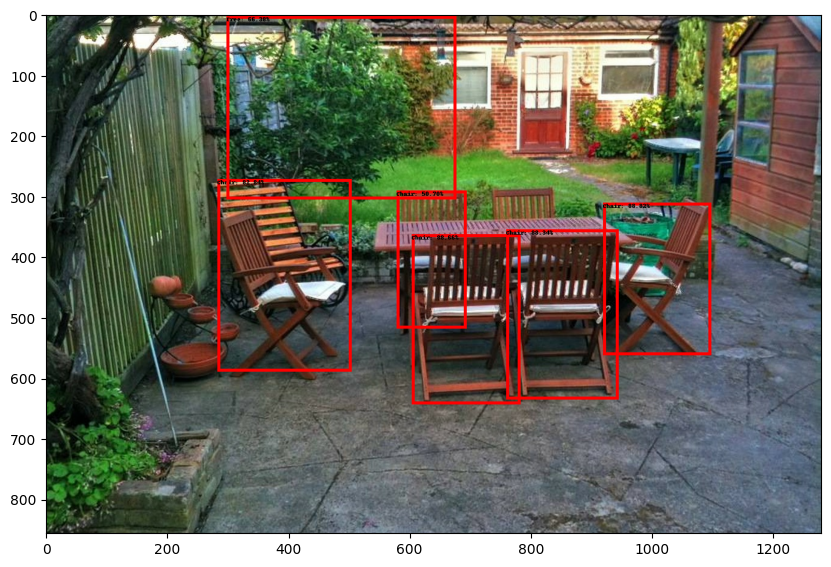

In [20]:
img = tf.io.read_file(downloaded_image_path)
img = tf.image.decode_jpeg(img, channels=3)
converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
result = detector(converted_img)

result = {key:value.numpy() for key,value in result.items()}
image_with_boxes = draw_boxes_on_image(img.numpy(), result["detection_boxes"], result["detection_class_entities"], result["detection_scores"])

display_image(image_with_boxes)


**EXPLANATION**

* This part of the code is where the object detection is performed on the downloaded image and the results are displayed.

* First, the image file is read into a TensorFlow tensor using tf.io.read_file. This tensor contains the raw bytes of the image file.

* Next, the raw image data is decoded into a 3-channel (red, green, blue) image tensor using tf.image.decode_jpeg. This tensor represents the image in a format that can be used by the TensorFlow model.

* The image tensor is then converted to a float32 tensor using tf.image.convert_image_dtype, and a new axis is added at the beginning of its shape using tf.newaxis. This is done because the model expects input images in a batch, so even though there’s only one image, it needs to be in a batch of size 1.

* The image tensor is then passed to the detector function, which runs the object detection model on the image. The model’s output is a dictionary containing the detected classes, their scores, and the coordinates of their bounding boxes.

* The model’s output is then converted from TensorFlow tensors to numpy arrays using the .numpy() method. This is done because the next function, draw_boxes_on_image, expects its inputs to be numpy arrays.

* The draw_boxes_on_image function is then called with the image and the model’s output as inputs. This function draws bounding boxes around the detected objects in the image and labels them with their class names and scores.

* Finally, the display_image function is called with the image with the drawn boxes as input. This function displays the image using matplotlib. The final result is the input image with bounding boxes drawn around the detected objects. The class of each detected object and its detection score is displayed at the top left corner of its bounding box. This allows you to see what objects the model detected in the image and how confident it was in its detections. The image will be displayed when you run plt.show() after calling this function. If you’re running this in a Jupyter notebook, the image will be displayed inline when the cell is run. If you’re running this in a Python script, a new window will open with the image when plt.show() is called.

* In summary, this part of the code is where the object detection task is performed and the results are displayed. It shows how to use a pre-trained TensorFlow model to detect objects in an image, draw bounding boxes around the detected objects, and display the results. This code could be used as a starting point for a variety of object detection tasks. For example, it could be used to detect objects in surveillance footage, in photos for a photo tagging app, or in frames from a video for a video analysis app. It could also be modified to use a different pre-trained model, to detect different types of objects, or to use different methods for displaying the results

# **CONCLUSION**
* In conclusion, this project effectively demonstrates the application of deep learning and computer vision techniques in object detection using a pre-trained Faster R-CNN model from TensorFlow Hub. The system developed is capable of downloading an image from a URL, resizing it, and applying the model to detect specific objects within the image.

* The implementation includes a filtering mechanism based on a minimum score threshold and a list of target classes, ensuring that only relevant and confident detections are considered. The system further enhances the output by drawing bounding boxes around the detected objects directly on the image and labeling them with their class names and detection scores. This provides a clear and immediate visual representation of the model’s detections.

* The project showcases the power and versatility of deep learning models, and how they can be leveraged to extract meaningful information from visual data. It serves as a foundation for a variety of applications, such as surveillance, autonomous driving, image tagging, and more. The project is a testament to the potential of deep learning and its significant role in advancing technology and solving complex problems.
